In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [3]:
data =  rng.normal(0,1,size=10000)

#標準正規分布関数
def f(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

#目的の分布 
def p(x):
    return 0.5*f(x+2) + 0.5*f(x-2)

#提案分布 N(0,4)
def q(x):
    return (1 / np.sqrt(8 * np.pi)) * np.exp(-x**2 / 8)

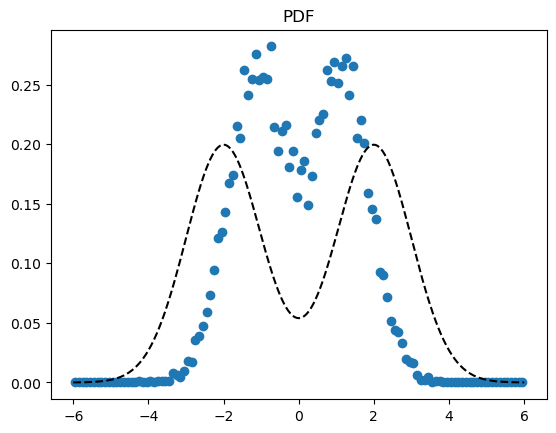

In [7]:
#棄却法 M=2
sample=[]
M=2
n=10000
while len(sample)<n:
    x=rng.normal(0, 1) #x ∼ q(x) を生成
    u=rng.uniform(0, 1) #u ∼ Uniform(0, 1) を生成
    acceptratio=p(x) / (M*q(x))
    if u<acceptratio : #u < p(x)/Mq(x) なら xを採用
        sample.append(x)

bins = np.linspace(-6, 6, 121)
bin_centers = 0.5*(bins[1:] + bins[:-1])
hist,_ = np.histogram(sample, bins, density = True)
plt.scatter(bin_centers, hist)

x_val = np.linspace(-6, 6, 500)
p_val=p(x_val)
plt.plot(x_val,p_val,linestyle='--',color='black')
plt.title("PDF")
plt.savefig("PDA_230868_10_3.png")
plt.show()